# KNN in Scikit Learn

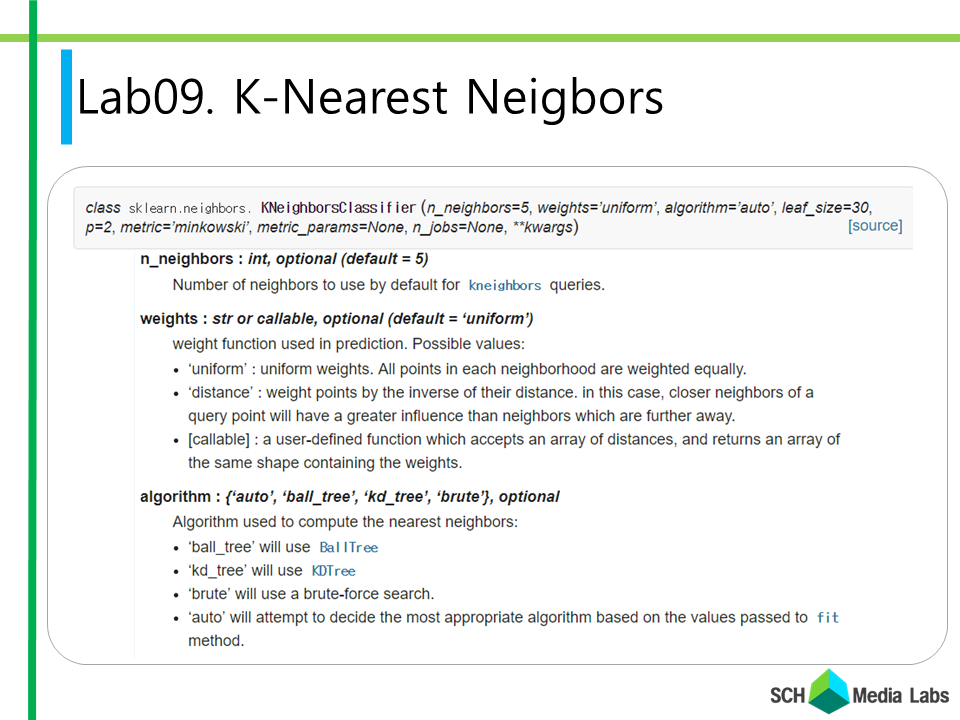

In [50]:
from sklearn.neighbors import KNeighborsClassifier 

X = [[0,1], [1,1], [2,7], [3,4],[4,2],[5,8],[6,11],[7,1],[8,5],[9,10],[10,3]]
y = [0,    0,   1,   1,  1,  1,  1,  2,  2,  2  , 2]

neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X, y) 
a = [10,5]
print(neigh.predict([a]))
print(neigh.predict_proba([a]))

[1]
[[0.18181818 0.45454545 0.36363636]]


## IRIS Example

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)#데이터 분할

clf = LDA(n_components = 2)
clf.fit(X_train, y_train)
X_trans_lda = clf.transform(X_train)

pca = PCA(n_components=2)
pca.fit(X_train)
X_trans_pca = pca.transform(X_train)

k = 11
neigh_pca = KNeighborsClassifier(n_neighbors=k) #모델정의
neigh_lda = KNeighborsClassifier(n_neighbors=k)
neigh_pca.fit(X_trans_pca,y_train) #학습
neigh_lda.fit(X_trans_lda,y_train) #학습
X_trans_test_lda = clf.transform(X_test)
X_trans_test_pca = pca.transform(X_test)

pred_lda = np.around(neigh_lda.predict(X_trans_test_lda)) #예측값을 반올림(선형회귀라서 소수점으로 나옴)
pred_pca = np.around(neigh_pca.predict(X_trans_test_pca)) #예측값을 반올림(선형회귀라서 소수점으로 나옴)
acc_lda = accuracy_score(y_test, pred_lda, normalize=True, sample_weight=None) #정확도 계산
acc_pca = accuracy_score(y_test, pred_pca, normalize=True, sample_weight=None) #정확도 계산
print('LDA :',acc_lda,'\nPCA :',acc_pca)


LDA : 0.9666666666666667 
PCA : 1.0
